<a href="https://colab.research.google.com/github/guftrindade/Covid19_Prophet_Python/blob/main/Covid19_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicando a biblioteca Prophet para predição de 30 dias da Covid-19
Dataset disponível em: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [26]:
# Importando as bibliotecas que iremos trabalhar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot

from fbprophet import Prophet

In [2]:
# Importando o dataset direto do github
covid = pd.read_csv('https://raw.githubusercontent.com/guftrindade/Covid19_Prophet_Python/main/covid_19_data.csv')

In [5]:
# Visualizando as primeiras linhas do dataset
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
# Visualizando as ultimas linhas do dataset
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0
285306,285307,05/02/2021,Zuid-Holland,Netherlands,2021-05-03 04:20:39,359327.0,4138.0,0.0


In [9]:
# Alterando o nome das colunas
covid.rename(columns={'ObservationDate': 'Date', 'Country/Region': 'Country'}, inplace = True)

In [10]:
# Visualizando as ultimas linhas do dataset
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0
285306,285307,05/02/2021,Zuid-Holland,Netherlands,2021-05-03 04:20:39,359327.0,4138.0,0.0


#Realizando o agrupamento por data

In [14]:
# Realizando o agrupamento das mortes por data e alocando na variavel mortes
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()

In [17]:
# Exibindo as ultimas linhas da variavel morte (datas mais atuais)
mortes.tail()

,Date,Deaths
462,12/27/2020,1771594.0
463,12/28/2020,1781349.0
464,12/29/2020,1796718.0
465,12/30/2020,1811773.0
466,12/31/2020,1824942.0


#Visualizando as óbitos de covid-19

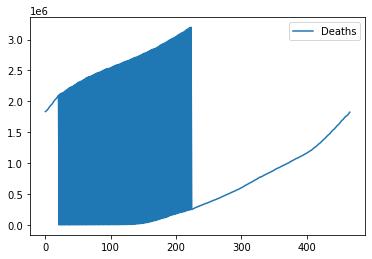

In [31]:
mortes.plot()

#**Prophet - Primeiros passos**

#Formato das colunas de dados: **ds** e **dy**

A coluna **ds** (date) deve ter o formado AAAA-MM-DD para uma data ou AAAA-MM-DD HH:MM:SS para timestamp.

A coluna **y** deve ser numérica e representa a medida que queremos fazer a previsão

##**Criando as colunas ds e y**

In [32]:
# Renomeando as colunas de uma vez
mortes.columns = ['ds', 'y']

In [33]:
# Verificando se foram renomeadas
mortes.tail()

,ds,y
462,12/27/2020,1771594.0
463,12/28/2020,1781349.0
464,12/29/2020,1796718.0
465,12/30/2020,1811773.0
466,12/31/2020,1824942.0


In [36]:
# Transformando a coluna 'ds' para o tipo datetime (AAAA-MM-DD)
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
462,2020-12-27,1771594.0
463,2020-12-28,1781349.0
464,2020-12-29,1796718.0
465,2020-12-30,1811773.0
466,2020-12-31,1824942.0


#**Previsão de MORTES da COVID-19 no mundo**
Objetivo - Realizar a previsão de uma semana (periods=30), com intervalos de confiança de 95%

In [65]:
# Colocando intervalo de confiança
dias = 30

m = Prophet(interval_width=0.95)

# Treinando o meu modelo (diferente do ScikitLearn, aqui eu já coloco o dataset de uma vez)
m.fit(mortes)

# Aloco o resultado futuro em uma variável com a quantidade de períodos que desejo prever
futuro = m.make_future_dataframe(periods = dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
# Visualizando os dias que foram previstos
futuro.tail(dias)

,ds
467,2021-05-03
468,2021-05-04
469,2021-05-05
470,2021-05-06
471,2021-05-07
472,2021-05-08
473,2021-05-09
474,2021-05-10
475,2021-05-11
476,2021-05-12


In [67]:
# Realizando a previsão
previsao = m.predict(futuro)

In [68]:
# Exibindo a previsão dos dias futuros
# Aqui, o que buscamos é o yhat (previsão efetiva)
previsao.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
467,2021-05-03,3.171137e+06,3.152923e+06,3.183205e+06,3.171112e+06,3.171137e+06,-2501.467679,-2501.467679,-2501.467679,-2501.467679,-2501.467679,-2501.467679,0.0,0.0,0.0,3.168636e+06
468,2021-05-04,3.181239e+06,3.163775e+06,3.195362e+06,3.180753e+06,3.182119e+06,-1379.417342,-1379.417342,-1379.417342,-1379.417342,-1379.417342,-1379.417342,0.0,0.0,0.0,3.179859e+06
469,2021-05-05,3.191340e+06,3.175969e+06,3.206857e+06,3.190233e+06,3.193155e+06,-60.089517,-60.089517,-60.089517,-60.089517,-60.089517,-60.089517,0.0,0.0,0.0,3.191280e+06
470,2021-05-06,3.201442e+06,3.185866e+06,3.217229e+06,3.199307e+06,3.204780e+06,961.565211,961.565211,961.565211,961.565211,961.565211,961.565211,0.0,0.0,0.0,3.202403e+06
471,2021-05-07,3.211543e+06,3.197300e+06,3.230481e+06,3.208349e+06,3.216589e+06,1890.105881,1890.105881,1890.105881,1890.105881,1890.105881,1890.105881,0.0,0.0,0.0,3.213433e+06
472,2021-05-08,3.221645e+06,3.205329e+06,3.240261e+06,3.217112e+06,3.228616e+06,1575.431061,1575.431061,1575.431061,1575.431061,1575.431061,1575.431061,0.0,0.0,0.0,3.223220e+06
473,2021-05-09,3.231746e+06,3.214293e+06,3.248680e+06,3.225392e+06,3.240489e+06,-486.127616,-486.127616,-486.127616,-486.127616,-486.127616,-486.127616,0.0,0.0,0.0,3.231260e+06
474,2021-05-10,3.241848e+06,3.222131e+06,3.257886e+06,3.233029e+06,3.252449e+06,-2501.467679,-2501.467679,-2501.467679,-2501.467679,-2501.467679,-2501.467679,0.0,0.0,0.0,3.239346e+06
475,2021-05-11,3.251949e+06,3.232290e+06,3.271319e+06,3.240471e+06,3.264523e+06,-1379.417342,-1379.417342,-1379.417342,-1379.417342,-1379.417342,-1379.417342,0.0,0.0,0.0,3.250570e+06
476,2021-05-12,3.262051e+06,3.241922e+06,3.285419e+06,3.248635e+06,3.276943e+06,-60.089517,-60.089517,-60.089517,-60.089517,-60.089517,-60.089517,0.0,0.0,0.0,3.261991e+06


In [74]:
# Selecionando a coluna data, previsão mínima, previsão efetiva e previsão máxima
previsao[['ds',  'yhat_lower','yhat', 'yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
492,2021-05-28,3.362272e+06,3.425564e+06,3.494395e+06
493,2021-05-29,3.367557e+06,3.435351e+06,3.509323e+06
494,2021-05-30,3.372647e+06,3.443391e+06,3.520900e+06
495,2021-05-31,3.382007e+06,3.451477e+06,3.529596e+06
496,2021-06-01,3.387442e+06,3.462701e+06,3.549736e+06


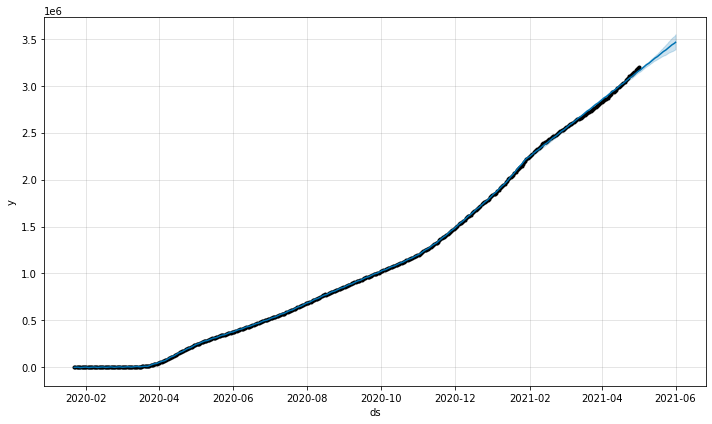

In [76]:
# Visualizando a previsão
confirmed_forecast_plot = m.plot(previsao)